In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Preprocessing

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import glob

# input and output directories
root_dir   = '/Users/joshuavargas/research/datasets/BB-MAS_Dataset/BB-MAS_Dataset/'
output_dir = '/Users/joshuavargas/research/datasets/BB-MAS_Preprocessed/'

# folders 1 - 117
for i in range(1, 118):
    folder_path = os.path.join(root_dir, str(i))
    csv_files = glob.glob(os.path.join(folder_path, '*_PocketPhone_*.csv'))
    
    if not csv_files:
        #print(f"No PocketPhone files in directory {i}")
        continue
    
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        output_df = df[['EID', 'time']].copy()
        
        scaler = MinMaxScaler(feature_range = (-1, 1))
        
        for column in ['Xvalue', 'Yvalue', 'Zvalue']:
            scaled_values = scaler.fit_transform(df[[column]])
            output_df[column] = scaled_values
        
        output_filename = os.path.basename(csv_file)
        output_df.to_csv(os.path.join(output_dir, output_filename), index=False)
        
        #print(f"Processed and saved: {output_filename}")


No PocketPhone files in directory 9
No PocketPhone files in directory 12
No PocketPhone files in directory 14


## Preprocess check 

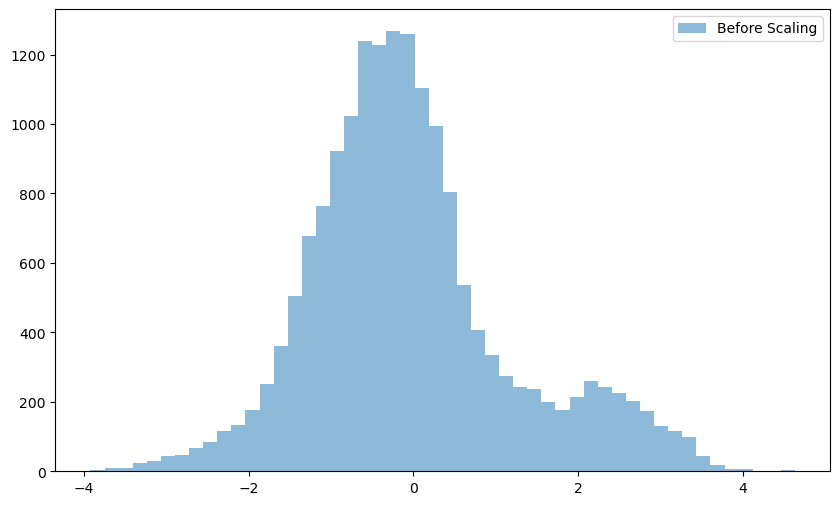

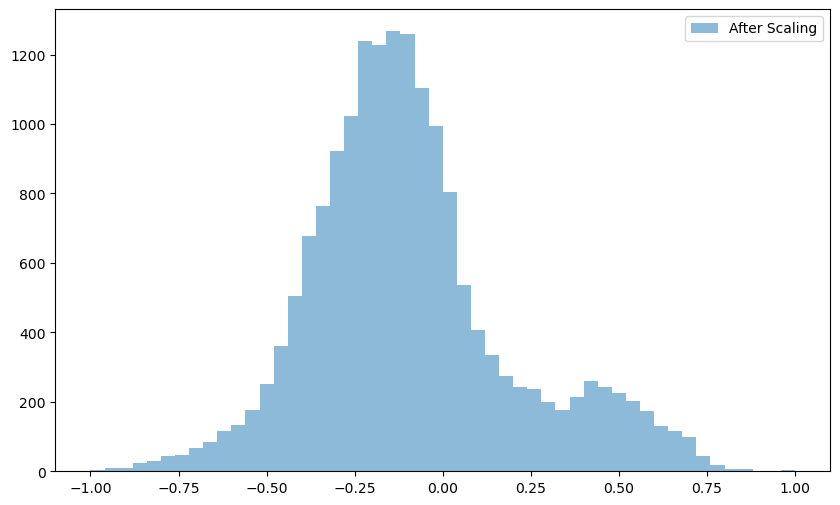

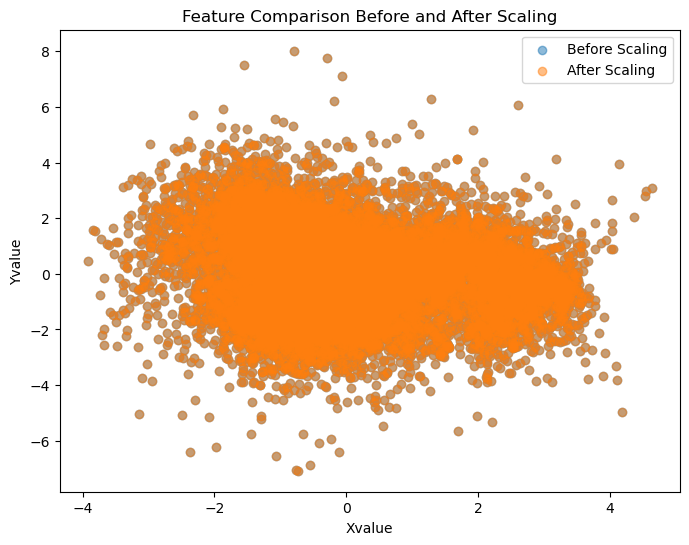

In [21]:
import matplotlib.pyplot as plt

root_dir   = '/Users/joshuavargas/research/datasets/BB-MAS_Dataset/BB-MAS_Dataset/'
output_dir = '/Users/joshuavargas/research/datasets/BB-MAS_Preprocessed/'

folder_path = os.path.join(root_dir, "1")
csv_files = glob.glob(os.path.join(folder_path, '*_PocketPhone_*.csv'))
scaled_files = glob.glob(os.path.join(output_dir, '1_PocketPhone_*.csv'))

df = pd.read_csv(csv_files[0])
X_train = df['Xvalue']
X_scatter = df[['Xvalue', 'Yvalue']]

df_scaled = pd.read_csv(scaled_files[0])
X_train_scaled = df_scaled['Xvalue']
X_scatter_scaled = df[['Xvalue', 'Yvalue']]

# histograms
# before scaling
plt.figure(figsize=(10, 6))
plt.hist(X_train, bins=50, alpha=0.5, label='Before Scaling')
plt.legend()
plt.show()

# after scaling
plt.figure(figsize=(10, 6))
plt.hist(X_train_scaled, bins=50, alpha=0.5, label='After Scaling')
plt.legend()
plt.show()

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scatter['Xvalue'], X_scatter['Yvalue'], alpha=0.5, label='Before Scaling')
plt.scatter(X_scatter_scaled['Xvalue'], X_scatter_scaled['Yvalue'], alpha=0.5, label='After Scaling')
plt.title("Feature Comparison Before and After Scaling")
plt.xlabel("Xvalue")
plt.ylabel("Yvalue")
plt.legend()
plt.show()

